### CIS 4360 Stock Recommendation Based on DCF

#### Instructor: Alex Pang
#### Student: Brandon Zheng

In [2]:
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import option
import utils

import os
import sqlite3

In [4]:
# Need to switch to your version
# from stock import Stock
# from DCF_model import DiscountedCashFlowModel
from stock import Stock
from DCF_model import DiscountedCashFlowModel

**Question: Use this notebook to run your DCF model for the stock that you recommend. Plot the stock price of that stock and possibly include a few Moving Averages and/or RSI**

In [5]:
# Type your code below, something like

# opt = option.Option()
# opt.sqlite_db = ...

# ticker = 'NVDA'
# stock = Stock(opt)
# stock.load_financial_data()
# model = DiscountedCashFlowModel(...)

opt = option.Option()
opt.data_dir = "./data"
opt.output_dir = os.path.join(opt.data_dir, "daily")
opt.sqlite_db = os.path.join(opt.data_dir, "sqlitedb/Equity.db")
db_file = opt.sqlite_db
db_connection = sqlite3.connect(db_file)

ticker = 'MA'
stock = Stock(opt, db_connection, ticker)
stock.load_financial_data()

as_of_date = datetime.date(2023, 11, 1)
model = DiscountedCashFlowModel(stock, as_of_date)
model.set_FCC_growth_rate(.2084, .2084/2, .04) #6.27% from finviz
fair_value = model.calc_fair_value()

print(f"DCF fair value for {ticker} as of {as_of_date}: ${fair_value}")

Loading financial data for MA
DCF fair value for MA as of 2023-11-01: $401.7996987333955


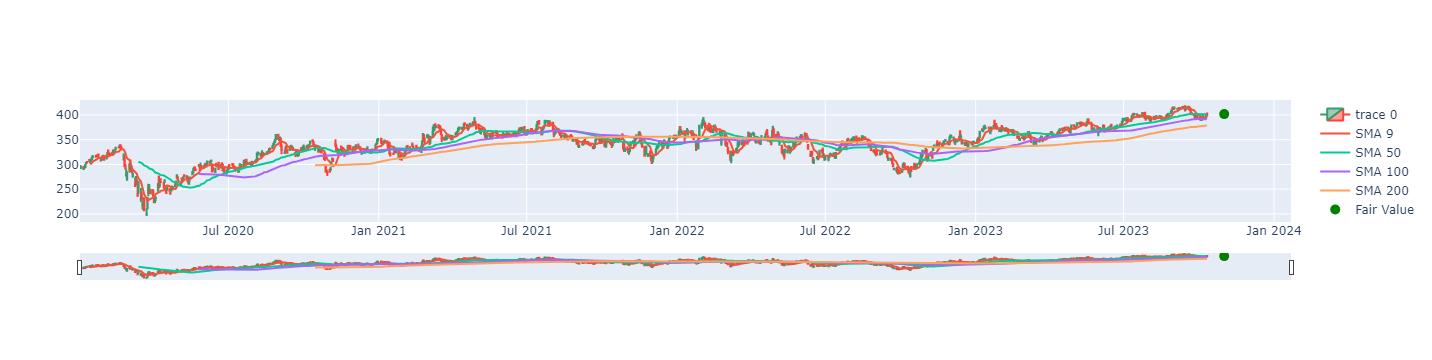

In [27]:
# Plot the price graph
start_date = datetime.date(2020, 1, 1)
end_date = as_of_date
df = stock.get_daily_hist_price(start_date, end_date)
df.head()
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close']
                            )

fig_sma = go.Figure(data=[candlestick])

import TA #reuse TA.py from previous project
# Calculate and add SMAs to the figure
s1 = TA.SimpleMovingAverages(df, [9])
s1.run()
fig_sma.add_trace(go.Scatter(x=s1.get_series(9).index, y=s1.get_series(9).values, mode='lines', name="SMA 9"))

s2 = TA.SimpleMovingAverages(df, [50])
s2.run()
fig_sma.add_trace(go.Scatter(x=s2.get_series(50).index, y=s2.get_series(50).values, mode='lines', name="SMA 50"))

s3 = TA.SimpleMovingAverages(df, [100])
s3.run()
fig_sma.add_trace(go.Scatter(x=s3.get_series(100).index, y=s3.get_series(100).values, mode='lines', name="SMA 100"))

s4 = TA.SimpleMovingAverages(df, [200])
s4.run()
fig_sma.add_trace(go.Scatter(x=s4.get_series(200).index, y=s4.get_series(200).values, mode='lines', name="SMA 200"))

#store fair value as pandas series
fair_value = pd.Series([401.7996987333955], index=[datetime.date(2023, 11, 1)])
#trace for fair val
fair_value_trace = go.Scatter(x=fair_value.index, y=fair_value.values, mode='markers', name="Fair Value", marker=dict(color='green', size=10))
#add fair val to existing graph
fig_sma.add_trace(fair_value_trace)
#show graph
fig_sma.show()
